In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
number_of_tag_barcode = 384
number_of_pcr_index = 384
input_cell_number = 20000
sort_cell_number = 20

In [3]:
tag_barcode_name_list = []
for i in range(number_of_tag_barcode):
    tag_barcode_name_list.append("TAG"+str(i))

pcr_index_name_list = []
for i in range(number_of_pcr_index):
    pcr_index_name_list.append("PCR"+str(i))


In [4]:
###
class cell:
    def __init__(self, cellID):
        self.cellID = cellID
    def set_tag_barcode(self, tag_barcode):
        self.tag_barcode = tag_barcode
    def set_pcr_index(self,pcr_index):
        self.pcr_index = pcr_index

    def get_tag_barcode(self):
        return self.tag_barcode
    def get_pcr_index(self):
        return self.pcr_index
    def get_cell_info(self):
        cell_info = self.tag_barcode + "|" + self.pcr_index
        return cell_info
        
def select_randomly_from_list(inputList):
    random_index = random.randrange(len(inputList))
    return inputList[random_index]

In [5]:
### randomly add cell with tag_barcode
cell_dict={}
cellID_count =0
for well in range(len(tag_barcode_name_list)):
    this_well_dict = {}
    for i in range(round(input_cell_number/len(tag_barcode_name_list))):
        cellID_count = cellID_count+1
        this_cell = cell(str(cellID_count))
        chosen_tag_barcode = tag_barcode_name_list[well]
        this_cell.set_tag_barcode(chosen_tag_barcode)
        cell_dict[cellID_count] = this_cell
# print(cell_dict)


In [6]:
### randomly sort a number of cell to one of the pcr_index well 
second_cell_dict = {}
for well in range(len(pcr_index_name_list)):
    ### pcr_index_name_list[idx] is selected, sort k number of cell into this well
    ### randomly drawn form the cell_dict 
    this_well_dict = {}
    for k in range(sort_cell_number):
        idx = random.choice(list(cell_dict))
        chosen_cell = cell_dict[idx]
        cell_dict.pop(idx)
        chosen_index =  pcr_index_name_list[well]
        chosen_cell.set_pcr_index(chosen_index)
        
        ### build some info to work with downstream
        cell_information = {"tag_barcode" : chosen_cell.get_tag_barcode(), "pcr_index" : chosen_cell.get_pcr_index(),"barcode_index" : chosen_cell.get_cell_info(),"pcr_well" : well }
        this_well_dict[idx] = cell_information 
    second_cell_dict[well] = this_well_dict.copy()

In [7]:
pooled_cell_dict ={} ### pooled final dict
for well in second_cell_dict:
    cell_in_well_dict = second_cell_dict[well]
    for cell in cell_in_well_dict:
        # print(type(cell_in_well_dict[cell]))
        pooled_cell_dict[cell] = cell_in_well_dict[cell].copy()

In [8]:
### calculate simulation collition rate
import pandas as pd
df = pd.DataFrame.from_dict(pooled_cell_dict,    orient="index")
frequency_of_each_combination = df["barcode_index"].value_counts()
collision_count = 0
unique_count =0
for item in frequency_of_each_combination:
    if item != 1:
        collision_count = collision_count + item
    else: 
        unique_count = unique_count + item
### collision rate as a fraction of total 
collision_rate =  collision_count / (collision_count + unique_count)



In [9]:
total_nuclei = len(df)
recovered_barcode = len(frequency_of_each_combination)
cluster_per_nucleus = round(400000000/recovered_barcode)
print("total nuclei generated: ",total_nuclei)
print("recovered barcodes: ",recovered_barcode)
print("collision rate: ",collision_rate)
df

total nuclei generated:  7680
recovered barcodes:  7513
collision rate:  0.04296875


,tag_barcode,pcr_index,barcode_index,pcr_well
15352,TAG295,PCR0,TAG295|PCR0,0
17306,TAG332,PCR0,TAG332|PCR0,0
224,TAG4,PCR0,TAG4|PCR0,0
9313,TAG179,PCR0,TAG179|PCR0,0
11579,TAG222,PCR0,TAG222|PCR0,0
...,...,...,...,...
16539,TAG318,PCR383,TAG318|PCR383,383
9179,TAG176,PCR383,TAG176|PCR383,383
4313,TAG82,PCR383,TAG82|PCR383,383
18613,TAG357,PCR383,TAG357|PCR383,383


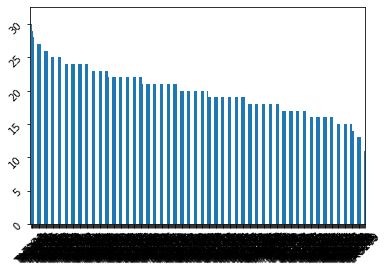

In [10]:
### Showing some metrics related to theend result
#### barchart of freaquency of each tag_barcode , pcr_index and barcode_index
plt_tag = df["tag_barcode"].value_counts().plot(kind="bar")
plt_tag.tick_params(labelrotation=45)

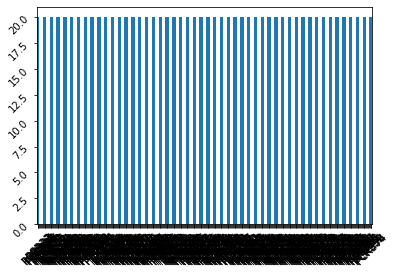

In [11]:
#### barchart of freaquency of each pcr_index 
plt_index = df["pcr_index"].value_counts().plot(kind="bar")
plt.tick_params(labelrotation=45)

<AxesSubplot:>

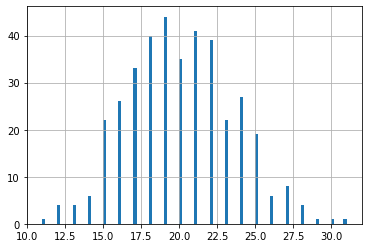

In [12]:
### histogram to show distribution 
df["tag_barcode"].value_counts(sort=False,dropna=False).hist(bins=100)

<AxesSubplot:>

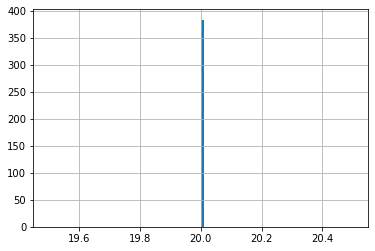

In [13]:
### histogram to show distribution 
df["pcr_index"].value_counts().hist(bins=100)

<AxesSubplot:>

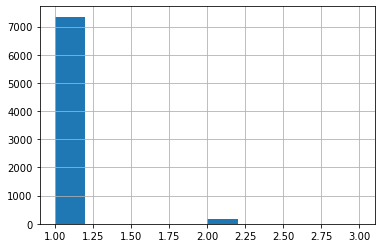

In [14]:
df["barcode_index"].value_counts().hist(bins=10)